<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml02_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn(scikit-learn) 패키지(모듈)의 neighbors 서브 모듈에 정의된 KNeighborsClassifier 클래스를 임포트.
from sklearn.neighbors import KNeighborsClassifier

# 데이터 준비

In [2]:
# 생선 품종(어종)과 생선 특성(길이, 무게, 두께, ...) 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [3]:
# CSV 파일을 읽고 DataFrame을 생성
fish = pd.read_csv(fish_csv)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색(Exploratory Data Analysis, EDA, 탐색적 데이터 분석)

In [5]:
# 숫자 타입 데이터들의 요약
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# 카테고리 변수의 빈도수
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

어종(Species)을 제외한 나머지 5개 변수의 분포를 시각화

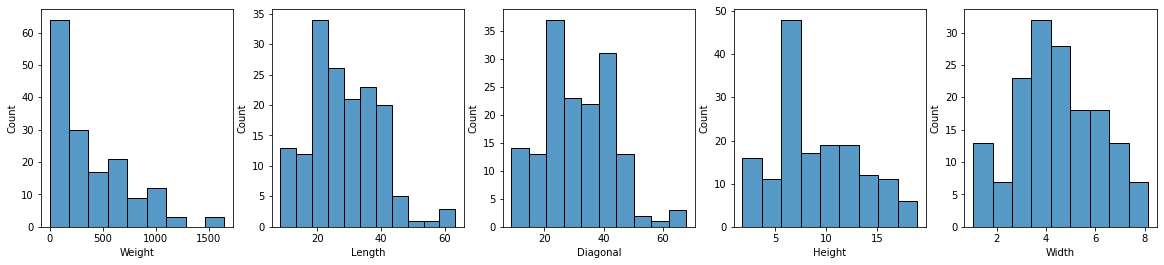

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

variables = fish.columns[1:]  # Weight, ..., Width 컬럼 이름들의 배열
for i, var in enumerate(variables):
    sns.histplot(data=fish, x=var, ax=ax[i])

plt.show()

5개 숫자 타입 변수들의 상관 관계 시각화

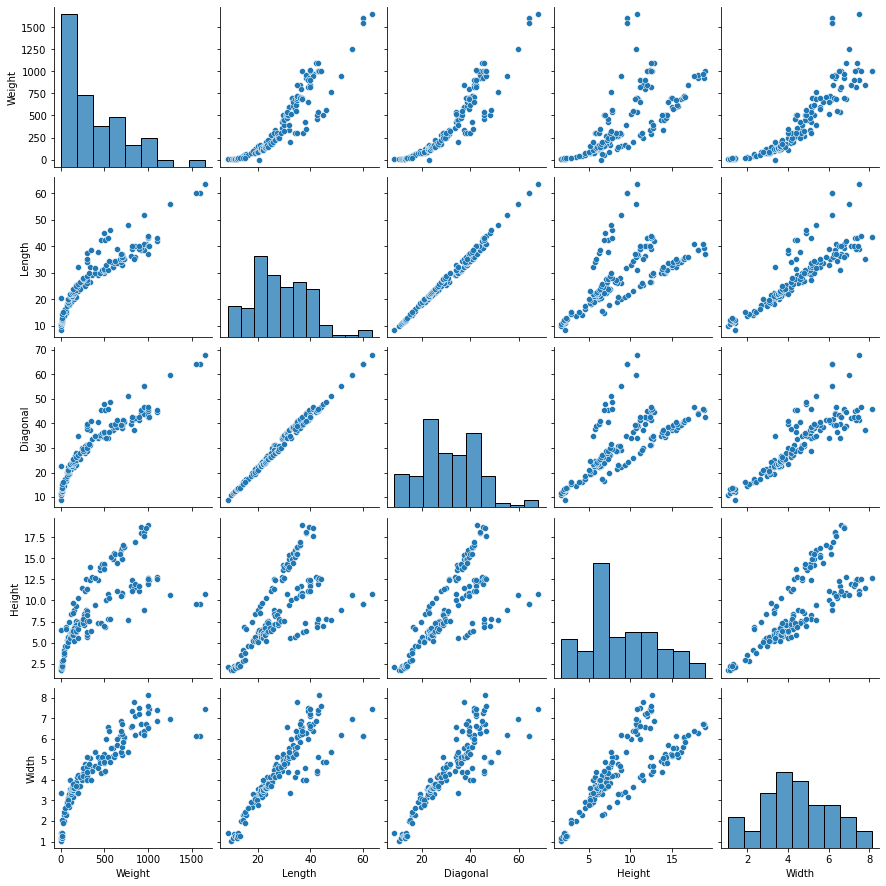

In [8]:
sns.pairplot(data=fish)
plt.show()

In [ ]:
# 타겟(어종)에 따라서 색깔을 다르게 표현
sns.pairplot(data=fish, hue='Species')
plt.show()